<a href="https://colab.research.google.com/github/varunkr24/AIML/blob/Python/Apple_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
# import needed libraries
import os as os
from PIL import Image
from array import array
#import cv2 as cv2
from glob import glob
import time
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import math
#from keras.utils import np_utils
from sklearn import preprocessing

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras import layers
seed = 7
np.random.seed(seed)

# for API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Concatenate, Dense, Dropout, Flatten, Activation

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K


In [2]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.5.0'

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
ScaleTo = 224  # px to scale
seed = 7  # fixing random
path = "/content/drive/MyDrive/AIML/Apple/*.png"
files = glob(path)

trainImg = []
trainLabel = []
j = 1

# Obtain images and resizing, obtain labels
for img in files:
    trainImg.append(cv2.resize(cv2.imread(img), (ScaleTo, ScaleTo)))  # Get image (with resizing)
    trainLabel.append(img.split('/')[-2])  # Get image label (folder name)
    j += 1

trainImg = np.asarray(trainImg)  # Train images set
trainLabel = pd.DataFrame(trainLabel)  # Train labels set

In [15]:
len(trainImg)

6

In [16]:
trainLabel

,0
0,Apple
1,Apple
2,Apple
3,Apple
4,Apple
5,Apple


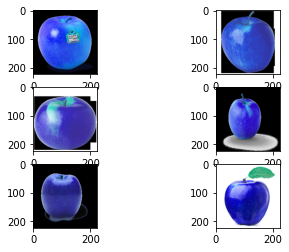

In [37]:
for i in range(6):
  plt.subplot(3,2, i+1)
  plt.imshow(trainImg[i])

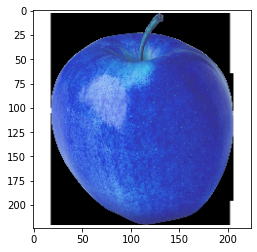

In [44]:
plt.imshow(trainImg[1]);

In [25]:
trainImg.shape

(6, 224, 224, 3)

OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. Displaying an image loaded with OpenCv in matplotlib, channels will be back to front.   
Fix this by tell OpenCV to explicitly convert it back to RGB

In [38]:
RGB_img = []
for i in range(6):
  RGB_img.append(cv2.cvtColor(trainImg[i-1], cv2.COLOR_BGR2RGB))

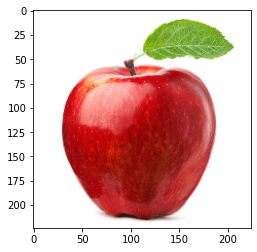

In [45]:
plt.imshow(RGB_img[0]);

In [47]:
!pip install tflearn

     |████████████████████████████████| 112kB 3.9MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127300 sha256=44f8883dbe3ba6ab54d895110a2dad4f7dd87db9046e6ee9912c9ef7b048d67a
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


In [48]:
from tflearn import *
import tflearn.datasets.oxflower17 as oxflower17
X, Y = oxflower17.load_data(one_hot=True, resize_pics=(224, 224))

Instructions for updating:
non-resource variables are not supported in the long term


100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


In [50]:
X.shape

(1360, 224, 224, 3)

In [55]:
RGB_img2 = []
for i in range(6):
  RGB_img2.append(X[i])

In [63]:
img2_label = []
label = "Not an apple"
for i in range(6):
  img2_label.append(label)

In [59]:
np.asarray(RGB_img2).shape

(6, 224, 224, 3)

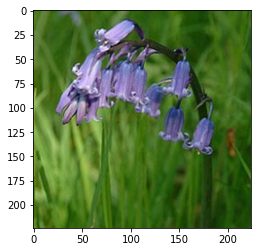

In [58]:
plt.imshow(RGB_img2[0])

In [61]:
for i in range(6):
  RGB_img.append(RGB_img2[i-1])

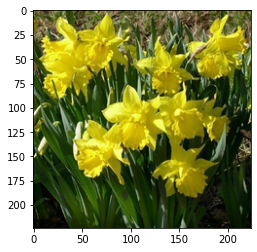

In [62]:
plt.imshow(RGB_img[10])

In [74]:
Label = []
for i in range(len(RGB_img)):
  if i < 6:
    Label.append("Apple")
  else:
    Label.append("Not an apple")

In [79]:
Label = np.asarray(Label)

In [85]:
Label = Label.reshape(-1, 1)

In [86]:

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(Label)
Label_encoded = one_hot_encoder.transform(Label)

In [87]:
Label_encoded

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [88]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=180,  # randomly rotate images in the range
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally
        height_shift_range=0.1,  # randomly shift images vertically 
        horizontal_flip=True,  # randomly flip images horizontally
        vertical_flip=True  # randomly flip images vertically
    )  
datagen.fit(RGB_img)

In [96]:
RGB_img = np.asarray(RGB_img)
l, h, w, c = RGB_img.shape
l, h, w, c

(12, 224, 224, 3)

In [97]:
RGB_img.shape

(12, 224, 224, 3)

In [99]:
modela = Sequential() 
# 2D Convolution layer
modela.add(tensorflow.keras.layers.Conv2D(12, (3, 3), activation='relu', input_shape=(h, w, c))) 
modela.add(tensorflow.keras.layers.MaxPooling2D((2, 2))) # to downsample the feature maps
# 2D Convolution layer
modela.add(tensorflow.keras.layers.Conv2D(64, (3, 3), activation='relu')) 
modela.add(tensorflow.keras.layers.MaxPooling2D((2, 2)))
# 2D Convolution layer
modela.add(tensorflow.keras.layers.Conv2D(128, (3, 3), activation='relu'))
modela.add(tensorflow.keras.layers.MaxPooling2D((2, 2)))
# 2D Convolution layer
modela.add(tensorflow.keras.layers.Conv2D(128, (3, 3), activation='relu'))
modela.add(tensorflow.keras.layers.MaxPooling2D((2, 2))) 
modela.add(tensorflow.keras.layers.Flatten()) 
modela.add(tensorflow.keras.layers.Dense(64, activation='relu'))

#Add Output Layer
modela.add(tensorflow.keras.layers.Dense(2, activation='softmax'))


modela.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model_A = modela
model_A.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 12)      336       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 111, 111, 12)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 64)      6976      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 128)      

In [101]:
t0=time.time()
history_A = model_A.fit_generator(datagen.flow(RGB_img, Label_encoded, batch_size=50), epochs=50)
t1=time.time()
print(t1-t0," seconds")


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training_v1.py:1246: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/50
1/1 [==============================] - 1s 1s/step - batch: 0.0000e+00 - size: 12.0000 - loss: 12.0812 - acc: 0.9167
Epoch 2/50
1/1 [==============================] - 1s 989ms/step - batch: 0.0000e+00 - size: 12.0000 - loss: 0.1267 - acc: 1.0000
Epoch 3/50
1/1 [==============================] - 1s 983ms/step - batch: 0.0000e+00 - size: 12.0000 - loss: 0.1468 - acc: 1.0000
Epoch 4/50
1/1 [==============================] - 1s 978ms/step - batch: 0.0000e+00 - size: 12.0000 - loss: 0.1962 - acc: 1.0000
Epoch 5/50
1/1 [==============================] - 1s 972ms/step - batch: 0.0000e+00 - size: 12.0000 - loss: 0.2932 - acc: 0.8333
Epoch 6/50
1/1 [==============================] - 1s 977ms/step - batch: 0.0000e+00 - size: 12.0000 - loss: 0.4537 - acc: 0.7500
Epoch 7/50
1/1 [==============================] - 1s 983ms/step - batch: 0.0000e+00 - size: 12.0000 - loss: 0.6106 - acc: 0.5000
Epoch 8/50
1/1 [==============================] - 1s 974ms/step - batch: 0.0000e+00 - size: 12.0000

In [103]:
print(model_A.evaluate(RGB_img, Label_encoded))  # Evaluate on train set

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


[1.8762371837510727e-05, 1.0]
